In [1]:
#процент населения, играющий в игру
import pandas as pd
import seaborn
import numpy as np

%matplotlib inline

print "Imported!"

Imported!


In [2]:
#Create dataset
pinfo = pd.read_csv("pinfo_ww.csv",sep="|")
population = pd.read_csv("population.csv") #population of the world

print "Read!"

Read!


In [3]:
df_common = pd.merge(pinfo, population, how='inner', on='country')
print df_common.head(3)

                 id  utc_timestamp gender  birthyear country region    city  \
0   111422139244026     1455786088      m     1937.0      RU     48  Moscow   
1  1669982366574606     1460640716      m     1983.0      RU     48  Moscow   
2  1667900523450249     1464274996      m     1983.0      RU     48  Moscow   

   traffic  traftype  population  
0  organic    direct   140702000  
1  organic    direct   140702000  
2  organic  bookmark   140702000  


In [4]:
table = df_common.groupby('country').size()
df_table = pd.DataFrame(table)
df_table = df_table.reset_index(level='country')
df_table.columns=['country','count_nump']
print df_table.columns

df_common_new = pd.merge(df_common,df_table,how='inner',on='country')
print "\n"
print "################################################\n"
print df_common_new.head(1)
print "\n"
print "################################################\n"

Index([u'country', u'count_nump'], dtype='object')


################################################

                id  utc_timestamp gender  birthyear country region    city  \
0  111422139244026     1455786088      m     1937.0      RU     48  Moscow   

   traffic traftype  population  count_nump  
0  organic   direct   140702000        1666  


################################################



In [6]:
df_common_new["percent"] = ""

country
AT    0.023400
SE    0.024113
GG    0.024529
LI    0.025714
RE    0.026900
RS    0.027679
US    0.028529
GR    0.030245
LT    0.030294
PT    0.031191
MT    0.034243
CA    0.035357
FK    0.037908
GI    0.039449
GB    0.041242
BE    0.041565
DE    0.042602
DK    0.052753
PM    0.057045
FR    0.071875
Name: percent, dtype: float64


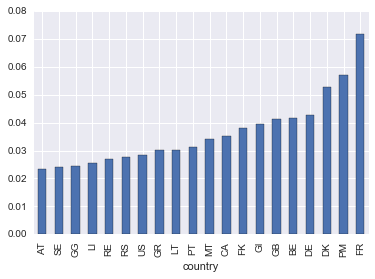

In [8]:
#процент населений стран (mean)
df_common_new.percent = (df_common_new.count_nump*100)/df_common_new.population
df_common_new
table_max_percent = df_common_new.groupby('country').percent.mean()
table_max_percent = table_max_percent.sort_values(inplace=False)
print table_max_percent.tail(20)
table_max_percent.tail(20).plot(kind='bar')

country
AT    0.023400
SE    0.024113
GG    0.024529
LI    0.025714
RE    0.026900
RS    0.027679
US    0.028529
GR    0.030245
LT    0.030294
PT    0.031191
MT    0.034243
CA    0.035357
FK    0.037908
GI    0.039449
GB    0.041242
BE    0.041565
DE    0.042602
DK    0.052753
PM    0.057045
FR    0.071875
Name: percent, dtype: float64


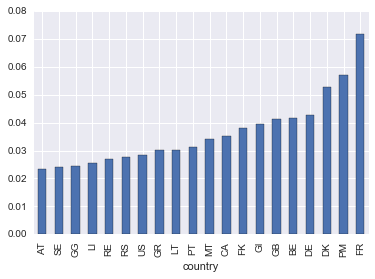

In [9]:
#процент населений стран (median)
df_common_new.percent = (df_common_new.count_nump*100)/df_common_new.population
df_common_new
table_max_percent = df_common_new.groupby('country').percent.median()
table_max_percent = table_max_percent.sort_values(inplace=False)
print table_max_percent.tail(20)
table_max_percent.tail(20).plot(kind='bar')